# Analyze qPCR of IFN-sorted cells
The MACS sorted cells (two sets) were analyzed by qPCR, and the ratio of IFNB1 to L32 was determined.
This was done in four technical replicates for each sample.
Both the IFN-enriched and IFN-depleted cells were analyzed.

Import modules and define functions:

In [32]:
library(ggplot2)
library(cowplot)
library(magrittr)
library(tidyverse)
library(IRdisplay)

# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
# The palette with grey:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", 
               "#0072B2", "#D55E00", "#CC79A7")

Read in the data:

In [5]:
qpcr_data <- read.csv("IFNB1_qPCR.csv")

qpcr_data

Virus,IFN.state,Replicate,IFNB1
Virus 1,IFN enriched,1,4.84765332
Virus 1,IFN enriched,2,3.62785200
Virus 1,IFN enriched,3,8.16743139
Virus 1,IFN enriched,4,5.40899272
Virus 1,IFN depleted,1,0.11353267
Virus 1,IFN depleted,2,0.06769613
Virus 1,IFN depleted,3,0.12800679
Virus 1,IFN depleted,4,0.11700516
Virus 2,IFN enriched,1,1.53458584
Virus 2,IFN enriched,2,1.04685733


Plot the data:

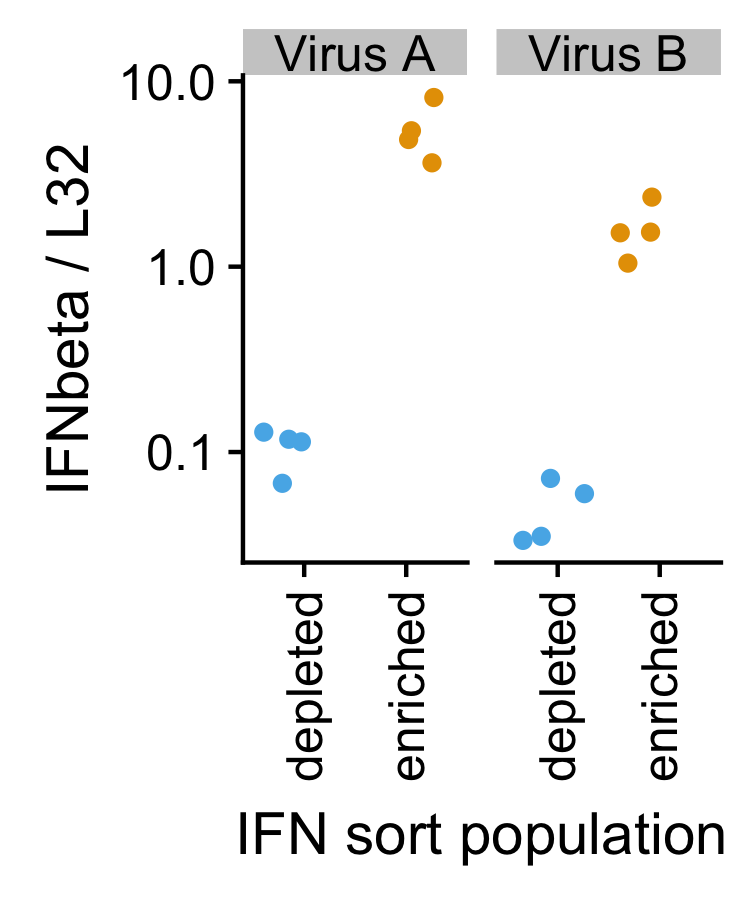

In [46]:
p <- ggplot(
    qpcr_data %>%
      mutate(IFN.state=gsub("IFN ", "", IFN.state),
             Virus=gsub("1", "A", Virus),
             Virus=gsub("2", "B", Virus)),
    aes(IFN.state, IFNB1, color=IFN.state)
  ) +
  geom_jitter(width=0.4) +
  scale_y_log10("IFNbeta / L32") +
  facet_wrap(~ Virus) +
  scale_color_manual(values=rev(cbPalette[2:3])) +
  theme(legend.position='none', axis.text.x=element_text(angle=90, vjust=0.5)) +
  xlab("IFN sort population")

plotfile <- "qPCR.png"
ggsave(plotfile, p, width=2.5, height=3, units="in")

display_png(file=plotfile)